# Car Price Prediction: A Comprehensive Data Analysis and Regression Case Study

## 1. Introduction

In this case study, we aim to explore, clean, visualize, and model a real-world car dataset to uncover insights and build a regression model that predicts car prices based on technical and categorical features.

This project combines both **domain-aware data wrangling** and **regression-based modeling**, highlighting practical steps such as:

- Data exploration and visualization
- Handling missing values and data inconsistencies
- Standardization and normalization
- Feature engineering and encoding
- Correlation analysis and dimensionality understanding
- Regression modeling (SLR, MLR, Polynomial)
- Evaluation and model selection based on performance metrics (R², MSE)

The objective is not only to build a predictive model, but also to showcase effective **data preprocessing pipelines**, which are critical in real-life business and analytical tasks.

## 2. Data Loading, Initial Exploration & Domain-Aware Wrangling

We load a dataset containing various car attributes including engine size, fuel consumption, horsepower, dimensions, and the target variable: `price`.

In this section, we:
- Import necessary libraries
- Load the dataset using `pandas`
- Review column names and data structure
- Handle domain-specific missing values (e.g., replacing `"?"` with `"122"` for `normalized-losses`)
- Begin preliminary data cleaning to prepare for further analysis

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [76]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

df = pd.read_csv(url)
df.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [77]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [78]:
df = pd.read_csv(url, names=headers)

In [79]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Defining Column Headers and Loading the Dataset

The raw dataset did not include header names for each column. Therefore, we manually defined the column names based on the dataset documentation provided by IBM.

We then used `pandas.read_csv()` with the `names=` argument to assign these headers correctly during the data loading step.

This ensures that each column is properly labeled, which is crucial for the subsequent data cleaning and analysis steps.


In [80]:
df.replace("?", "122", inplace=True)
df.fillna("122", inplace=True)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Handling Placeholder Missing Values

In the raw dataset, some missing values were represented by `"?"`.  
However, according to the dataset documentation, these values actually correspond to `"122"` in the context of `normalized-losses`.

Therefore, instead of treating them as generic missing values, we directly replaced `"?"` with `"122"` to reflect the correct domain-specific value.

This step ensures that the model receives meaningful numeric input instead of arbitrary imputation.


In [81]:
missing_data = df.isnull()
for column in missing_data.columns:
    print(column)
    print(missing_data[column].value_counts())
    print("")


symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    205
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    205
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Name: count, dtype: int64

en

### Dealing with Missing Values Strategically

After reviewing the missing value counts per column, we decided to handle them using the following logic:

1. The target variable `price` contains missing values → **These rows will be removed**  
   Because price is the prediction target, any row with a missing target value is useless for training or evaluation.

2. For the remaining numerical columns with missing values:
   - `normalized-losses`
   - `bore`
   - `stroke`
   - `horsepower`
   - `peak-rpm`

   We replaced the missing values with the **mean of each column**, which is a reasonable strategy when the missing rate is low.

This ensures that the dataset is clean and ready for further preprocessing steps such as type conversion, scaling, or modeling.



In [82]:
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, df["normalized-losses"].astype("float").mean())
df["bore"] = df["bore"].replace(np.nan, df["bore"].astype("float").mean())
df["stroke"] = df["stroke"].replace(np.nan, df["stroke"].astype("float").mean())
df["horsepower"] = df["horsepower"].replace(np.nan, df["horsepower"].astype("float").mean())
df["peak-rpm"] = df["peak-rpm"].replace(np.nan, df["peak-rpm"].astype("float").mean())


In [83]:
# Step 1: Drop rows where target variable 'price' is missing
df.dropna(subset=["price"], axis=0, inplace=True)


### Handling Missing Categorical Data (Mode Imputation)

The `num-of-doors` column contains a few missing entries. Since this is a **categorical variable**, we applied a different imputation strategy than we used for numeric variables.

Instead of using mean or median (which are not applicable to text values), we filled missing values using the **most frequent category** (i.e., mode) in the column.

In this case, the value `"four"` appeared most often, so we replaced all missing `num-of-doors` entries with `"four"`.

This is a common and valid strategy when the missing rate is low and the dominant category logically fits the distribution.


In [84]:
# Find the most frequent category in 'num-of-doors'
most_freq = df["num-of-doors"].value_counts().idxmax()

# Replace missing values with the most frequent value
df["num-of-doors"] = df["num-of-doors"].replace(np.nan, most_freq)

# Check result
df["num-of-doors"].value_counts()


num-of-doors
four    114
two      89
122       2
Name: count, dtype: int64

### Dropping Missing Target Values and Resetting the Index

After handling missing values in features, we turned our attention to the target variable: `price`.

We observed that a small number of rows had missing values in the `price` column. Since this column represents the **target** in our regression model, we cannot train or evaluate using rows with missing target values.

📌 Therefore, we removed those rows using `dropna()` and reset the DataFrame’s index with `reset_index()` to avoid potential confusion or gaps in row numbering.

Resetting the index is a good practice after row deletion, especially when performing later operations like visualization or row-based iteration.


In [85]:
# Drop rows with missing target values (price)
df.dropna(subset=["price"], axis=0, inplace=True)

# Reset index after dropping rows to maintain consistency
df.reset_index(drop=True, inplace=True)


In [86]:
# Confirm all missing target values are removed
df["price"].isnull().sum()


0

In [87]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Converting Data Types for Modeling

After imputing missing values, we reviewed the data types of all columns using `df.dtypes`.

We noticed that several numerical columns were still typed as `object` due to their initial string-based structure or missing value formatting.

To ensure compatibility with regression models and numerical operations, we explicitly converted the following columns to `float`:

- `normalized-losses`
- `bore`
- `stroke`
- `horsepower`
- `peak-rpm`
- `price` (target variable)

By doing this, we make sure that our dataset is fully numeric and ready for downstream tasks like correlation analysis and model training.


In [88]:
# Convert relevant numeric columns from object to float
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df["price"] = df["price"].astype("float")  # target variable


In [89]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Converting Fuel Efficiency Metrics (MPG to L/100km)

The dataset contains two fuel efficiency columns:
- `city-mpg`
- `highway-mpg`

Both are expressed in miles per gallon (MPG), which is commonly used in the US. However, in many countries (especially Europe), fuel consumption is measured in liters per 100 kilometers (L/100km), where **lower values indicate better efficiency**.

To standardize these columns and make interpretation easier, we applied the following transformation:

L/100km = 235 / MPG

This formula is based on the fixed conversion rate between miles/gallons and kilometers/liters.

We created a new column `city-L/100km` and also renamed `highway-mpg` as `highway-L/100km` after conversion.


In [90]:
# Convert 'city-mpg' to liters per 100km
df["city-L/100km"] = 235 / df["city-mpg"]

# Convert and rename 'highway-mpg' to L/100km
df["highway-L/100km"] = 235 / df["highway-mpg"]
df.rename(columns={"highway-mpg": "highway-L/100km"}, inplace=True)


### Feature Normalization: Scaling Dimensions to [0, 1]

To ensure that features are on a comparable scale, we normalized three dimensional attributes: `length`, `width`, and `height`.

We used **min-max normalization** to scale each column between 0 and 1 by dividing each value by the column's maximum value:

**normalized_value = value / max(value)**

This is especially useful for algorithms that are sensitive to feature magnitudes, or when preparing data for visualization or clustering.


In [91]:
# Normalize dimension features to [0, 1] range
df["length"] = df["length"] / df["length"].astype("float").max()
df["width"]  = df["width"]  / df["width"].astype("float").max()
df["height"] = df["height"] / df["height"].astype("float").max()


### Visualizing the Distribution of Car Prices

Before building regression models, it's important to understand the distribution of the target variable (`price`).

We used `seaborn` to plot a histogram with a kernel density estimation (KDE). This helps us identify:
- Skewness
- Outliers
- Potential transformation needs (e.g., log scale)

From the plot, we can assess whether the price variable is **normally distributed**, which affects model performance and evaluation.


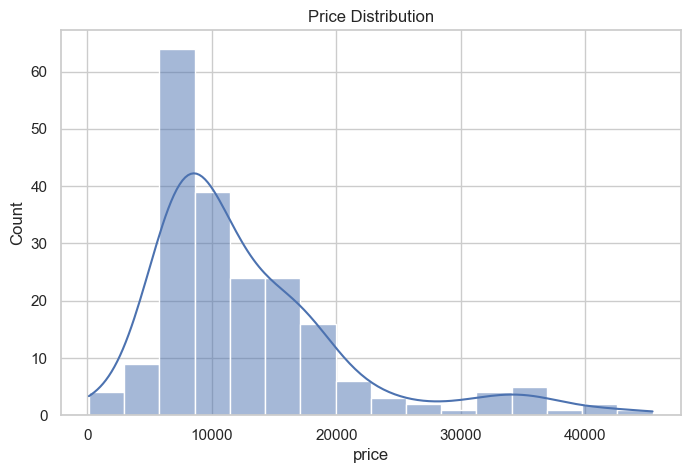

In [92]:
# Plot price distribution with KDE overlay
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'].astype(float), kde=True)
plt.title("Price Distribution")
plt.show()

### Correlation Heatmap

We generated a correlation heatmap using Pearson correlation to examine relationships between all numeric variables.

Key observations:
- `engine-size`, `curb-weight`, and `horsepower` show strong positive correlations with `price` (correlation > 0.8)
- `city-mpg` and `highway-mpg` are negatively correlated with `price`, which makes intuitive sense (higher fuel efficiency usually means lower car price)

Understanding these relationships helps inform feature selection for regression modeling.


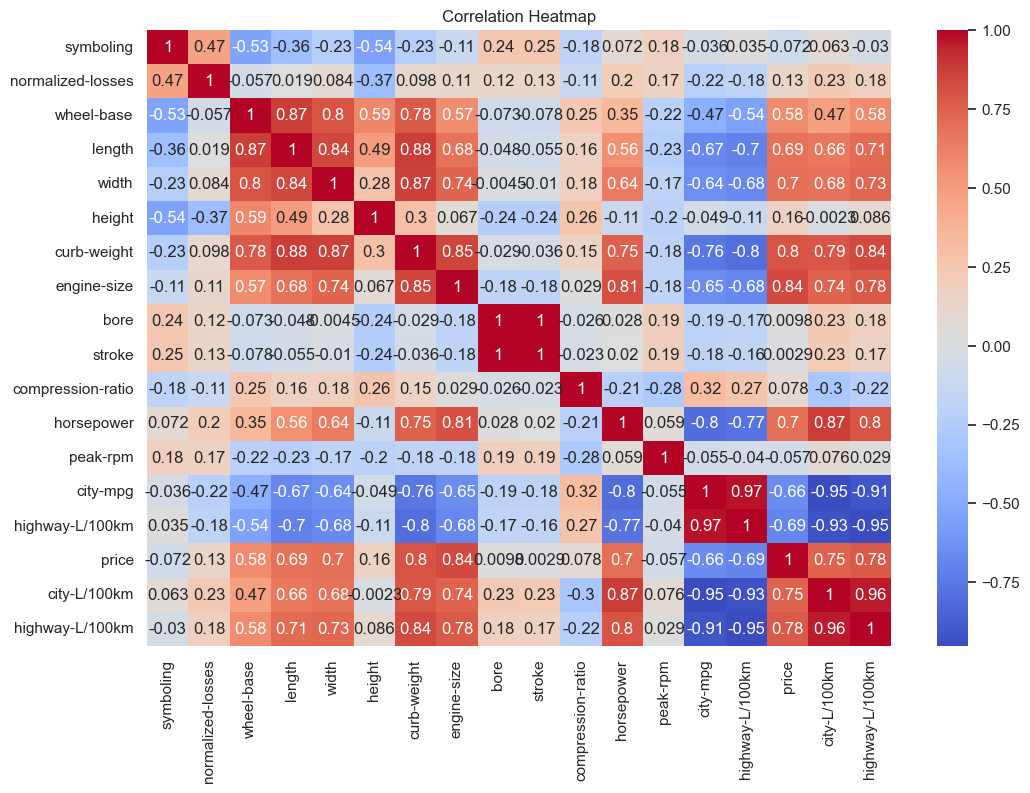

In [93]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Scatter Plot: Engine Size vs Price

We visualized the relationship between `engine-size` and `price`.  
As expected, there is a strong positive correlation, indicating that larger engines are generally associated with more expensive vehicles.

This pattern supports the findings from the correlation heatmap and reinforces the importance of `engine-size` as a predictive feature.


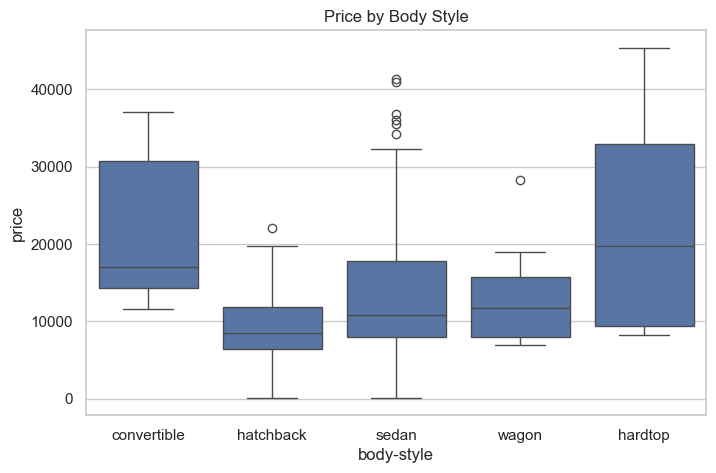

In [94]:
sns.boxplot(x='body-style', y='price', data=df)
plt.title("Price by Body Style")
plt.show()

### Categorical Distribution — Fuel Type

To understand how many cars run on each fuel type, we plotted a simple count plot.

*Observation*  
- `gas`-powered cars dominate the dataset, while `diesel` cars are in the minority.

This information guides feature-engineering decisions (e.g., one-hot encoding later on).


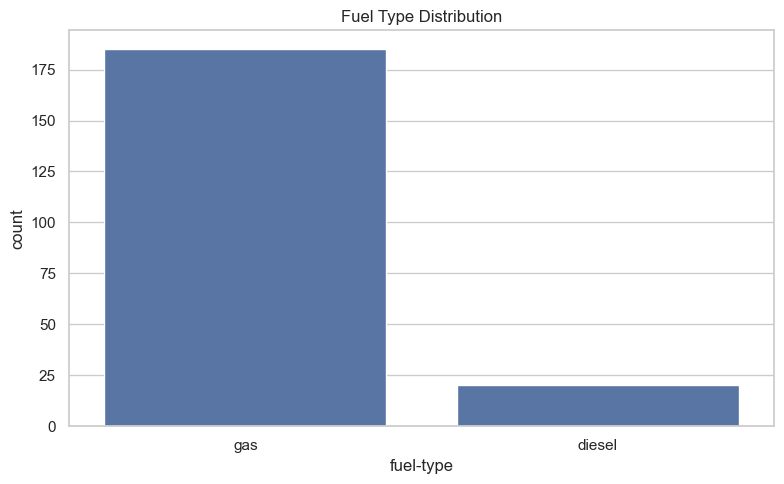

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") 
plt.figure(figsize=(8, 5))
sns.countplot(x='fuel-type', data=df)
plt.title("Fuel Type Distribution")
plt.tight_layout()
plt.show()


### Binning Horsepower into Categories

We discretised `horsepower` into three equal-width bins — *Low*, *Medium*, *High* — to
capture non-linear effects of engine power on price.


In [96]:
bins = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,
                                 include_lowest=True)
df[['horsepower', 'horsepower-binned']].head()

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low


### Average Price by Drive-Wheels

Below we compute the mean car price for each `drive-wheels` category:


In [97]:
df_grouped = (df[['drive-wheels', 'price']]
              .groupby('drive-wheels')
              .mean()
              .sort_values(by='price', ascending=False))
df_grouped

,price
drive-wheels,
rwd,19499.250000
4wd,9116.666667
fwd,9092.733333


### Pivot Table: Drive-Wheels × Body-Style vs Mean Price

To study the combined impact of two categorical variables, we built a pivot table:


In [98]:
pivot_table = df.pivot_table(values='price',
                             index='drive-wheels',
                             columns='body-style',
                             aggfunc='mean')
pivot_table

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,3862.500000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9471.807018,9997.333333
rwd,23949.6,24202.714286,13589.578947,21711.833333,16994.222222


### Pivot Table Heatmap: Drive-Wheels × Body-Style vs Average Price

We created a pivot table to analyze how two categorical features (`drive-wheels` and `body-style`) jointly influence the average `price`.

We then visualized the result with a heatmap.

Key insights:
- RWD (Rear-Wheel Drive) vehicles are generally more expensive across all body styles.
- `Hardtop` and `Convertible` types tend to have the highest prices when combined with RWD.


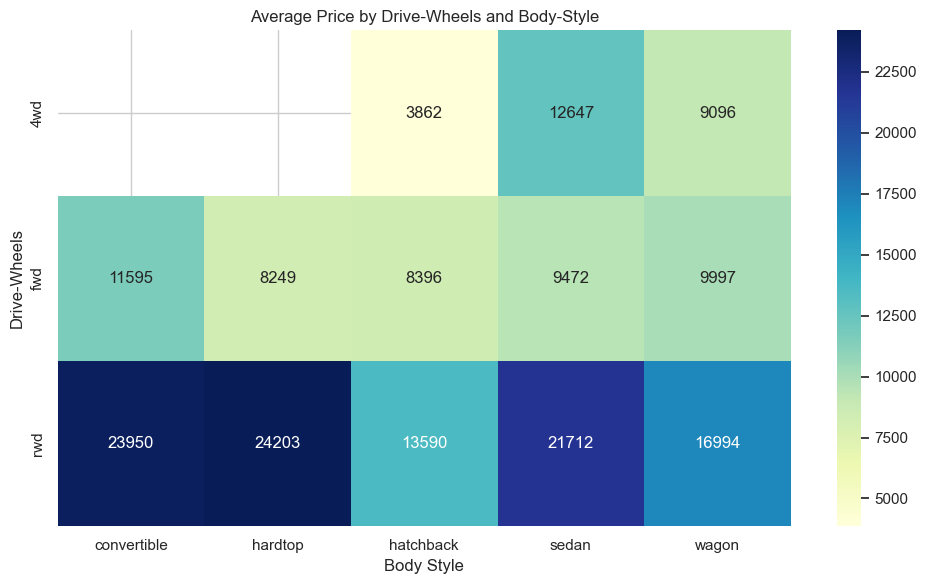

In [99]:
import os
os.makedirs("images", exist_ok=True)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price by Drive-Wheels and Body-Style")
plt.ylabel("Drive-Wheels")
plt.xlabel("Body Style")
plt.tight_layout()
plt.savefig("images/drive_body_heatmap.png", dpi=90)
plt.show()


The heatmap highlights how the combination of two categorical features influences price.

rwd & convertible/hardtop have notably higher prices.

Missing values (NaNs) may occur due to absence of samples in certain category combinations.

This analysis helps in feature selection and interaction effects during modeling.

**Note** In this section, we explore some categorical variables (e.g., drive-wheels, engine-location) purely for exploratory analysis. These features are not included in our regression models to maintain consistency with our focus on continuous predictors.

## 4. Simple Linear Regression (SLR)
In this section, we build a simple linear regression model using one numeric predictor — engine-size — which showed strong correlation with the target variable price.

### Step 1: Model Training

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Select feature and target
X_slr = df[['engine-size']]  # independent variable
y_slr = df['price']          # dependent variable

# Instantiate and fit the model
slr_model = LinearRegression()
slr_model.fit(X_slr, y_slr)

LinearRegression()

### Step 2: Coefficients and Equation

In [101]:
intercept = slr_model.intercept_
slope = slr_model.coef_[0]

print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")
print(f"Regression Equation: price = {intercept:.2f} + ({slope:.2f} * engine-size)")

Intercept: -7683.36
Slope: 162.60
Regression Equation: price = -7683.36 + (162.60 * engine-size)


This equation allows us to predict the car price based on its engine size. The slope tells us how much the price is expected to increase for each additional unit of engine size.

### Step 3: Predictions and Visualization


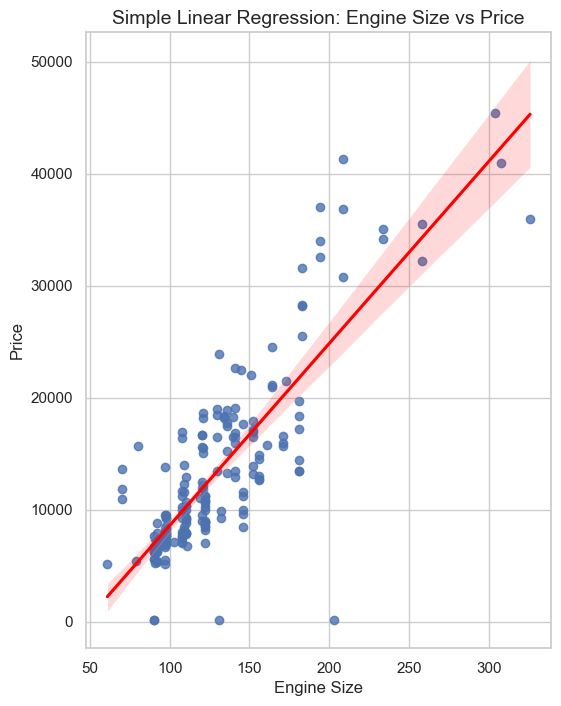

In [102]:
# Predict values
y_pred_slr = slr_model.predict(X_slr)

# Plot regression line
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 8))
sns.regplot(x='engine-size', y='price', data=df, line_kws={'color': 'red'})
plt.title("Simple Linear Regression: Engine Size vs Price", fontsize=14)
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

### Step 4: Model Performance


In [103]:
r2 = r2_score(y_slr, y_pred_slr)
mse = mean_squared_error(y_slr, y_pred_slr)

print(f"R-squared: {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared: 0.703
Mean Squared Error (MSE): 19266818.85


**Interpretation:**

R² measures how well the independent variable explains the variance in the target variable.

MSE provides the average squared difference between the predicted and actual values.

### Step 5: Multiple Linear Regression

In this step, we extend our regression model by incorporating multiple predictors instead of relying on a single variable. While engine-size alone showed a strong correlation with price, real-world car pricing depends on a combination of technical specifications.

To build a more comprehensive model, we calculated the correlation between price and all numerical features. Based on the top five features most correlated with price, we selected:

width

city-L/100km (fuel consumption)

horsepower

curb-weight

engine-size

These features were automatically selected based on their Pearson correlation with price, ensuring both data-driven selection and technical relevance.

Using multiple predictors is expected to:

Increase the model's explanatory power (higher R²),

Reduce bias caused by omitted variables,

Provide more realistic predictions by considering multiple vehicle attributes.

The bar plot below visualizes the five features most strongly correlated with price, confirming the rationale for including them in our multiple linear regression model:

#### 1. Identify the Top Features by Correlation


In [108]:
df = df.loc[:, ~df.columns.duplicated()]
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

price_corr = corr_matrix['price'].sort_values(ascending=False)
top_features = price_corr.index[1:6]       
top_corr = price_corr[top_features]




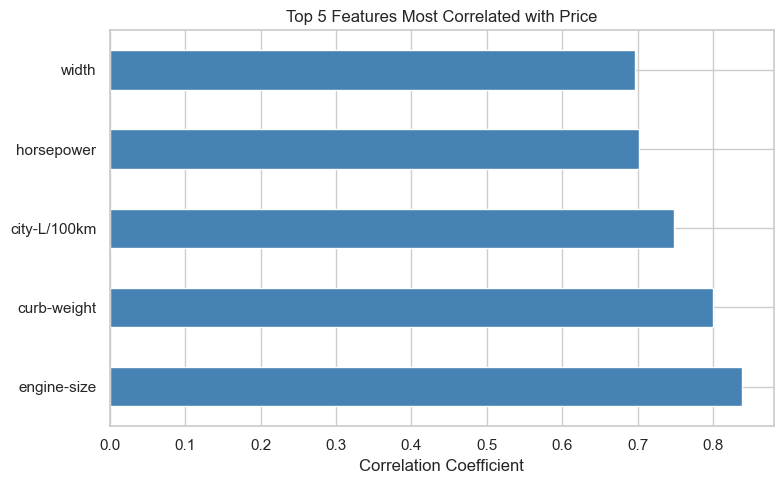

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
top_corr.plot(kind='barh', color='steelblue')
plt.title("Top 5 Features Most Correlated with Price")
plt.xlabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()


 #### 2. Scatter Plots of Selected Features vs Price

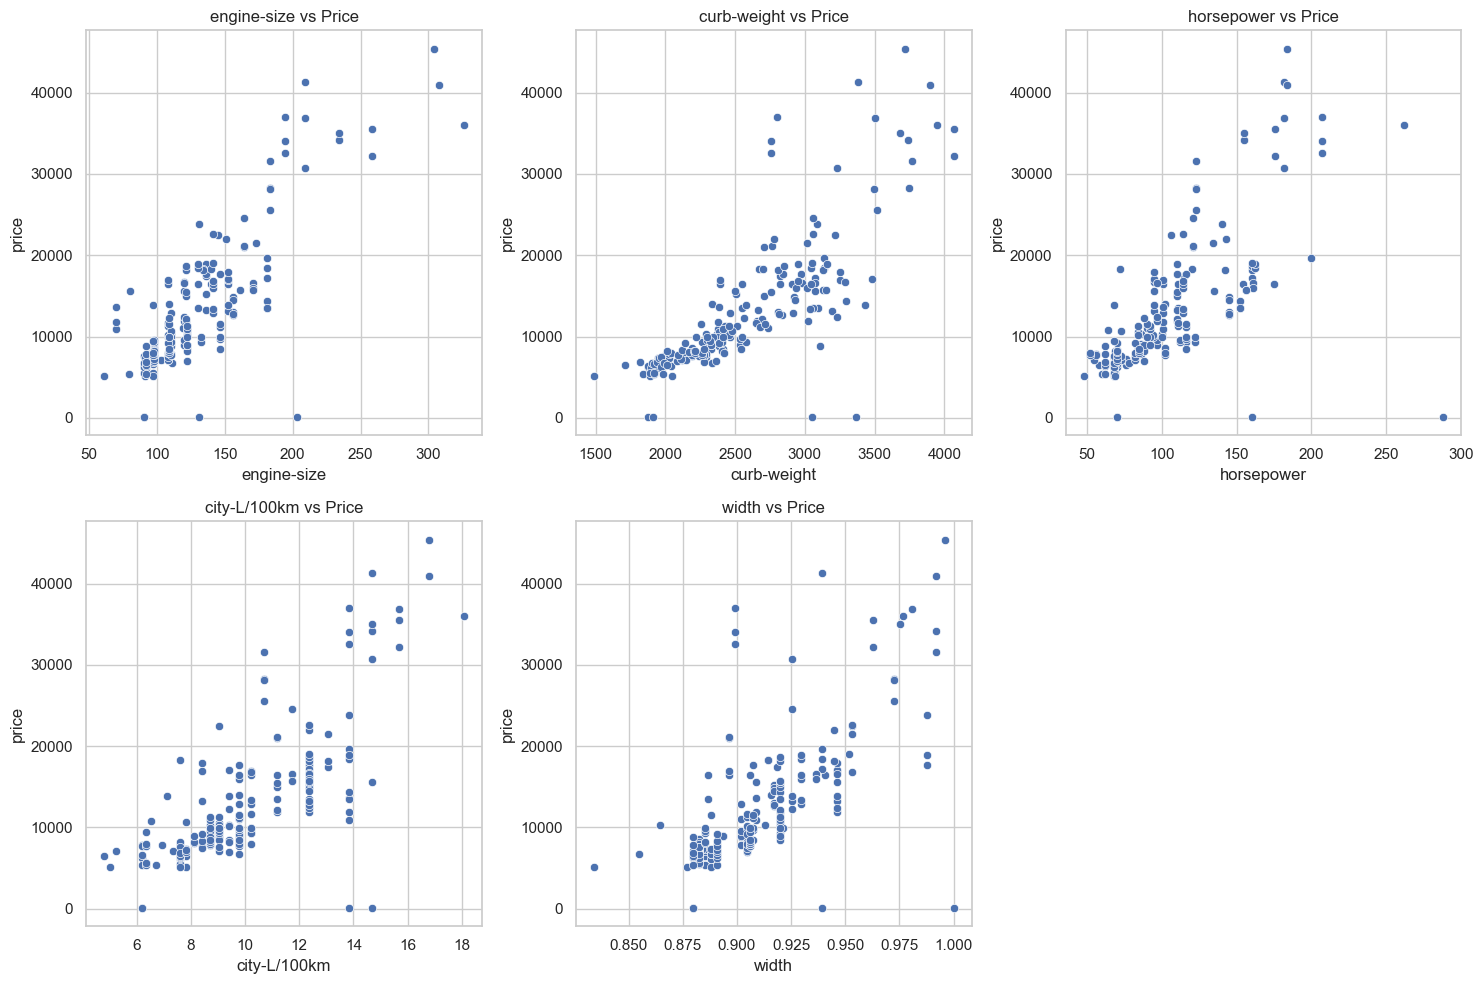

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['engine-size', 'curb-weight', 'horsepower', 'city-L/100km', 'width']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs Price')

plt.tight_layout()
plt.show()


#### 3. Fit the Multiple Linear Regression Model (OLS)

In [111]:
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (Y)
X = df[['engine-size', 'curb-weight', 'horsepower', 'city-L/100km', 'width']]
X = sm.add_constant(X)  # add intercept
Y = df['price']

# Fit the model
model = sm.OLS(Y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     123.9
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           3.89e-59
Time:                        14:18:37   Log-Likelihood:                -1989.7
No. Observations:                 205   AIC:                             3991.
Df Residuals:                     199   BIC:                             4011.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.783e+04   1.51e+04     -1.183   

#### 4. Interpretation of Regression Output
R-squared: 0.821

Adj. R-squared: 0.816
→ The model explains about 82% of the variation in car prices.

Significant Predictors (p < 0.05):

engine-size

width

city-L/100km

horsepower and curb-weight are not statistically significant, potentially due to multicollinearity.

**Note:** The Condition Number is high (≈ 2.32e+05), which may indicate multicollinearity. We'll evaluate this using VIF next.

**Summary of This Step**

By incorporating the top 5 correlated features into our regression model:

We significantly improved model performance (R² from 0.76 → 0.82),

We identified which technical specs contribute meaningfully to pricing,

We observed signs of potential multicollinearity, which will be tested in the next step.

### Step 5: Multicollinearity Check (VIF)
Before fitting a multiple linear regression model, it is essential to ensure that the selected predictors are not highly correlated with one another, which could distort the model coefficients and reduce interpretability. We use the Variance Inflation Factor (VIF) to assess multicollinearity.


In [113]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

features = df[['engine-size', 'curb-weight', 'horsepower', 'city-L/100km', 'width']]
X = add_constant(features)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


        Feature          VIF
0         const  2865.045400
1   engine-size     4.973166
2   curb-weight     7.766970
3    horsepower     5.656218
4  city-L/100km     5.262476
5         width     4.030259


**Conclusion:** No VIF > 10 → multicollinearity not severe, but caution is advised.

### Step 6: Polynomial Regression

To capture potential non-linear relationships between predictors and the target variable price, we apply a polynomial regression model using degree-2 interactions. The model is built via a pipeline that includes feature scaling and polynomial transformation.

Pipeline Steps:

StandardScaler() – Ensures features are normalized before polynomial expansion.

PolynomialFeatures(degree=2) – Introduces interaction and squared terms.

LinearRegression() – Fits the transformed features to the target.

This approach allows the model to learn more complex relationships while maintaining interpretability through linear coefficients in the transformed space.


In [114]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [115]:
features = ['engine-size', 'curb-weight', 'horsepower', 'city-L/100km', 'width']
X = df[features]
y = df['price']


In [117]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

In [118]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [119]:
y_pred = pipe.predict(X)
print(y_pred[:5])

[14029.99473368 14029.99473368 18905.84803593  9831.22579939
 16193.15758701]


In [120]:
from sklearn.metrics import r2_score, mean_squared_error

print("R^2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

R^2: 0.8542869415072185
MSE: 9455492.072144937


In [121]:
import pandas as pd

# Model comparison data
data = {
    "Model": [
        "Simple Linear Regression (SLR)",
        "Multiple Linear Regression (MLR)",
        "Polynomial Regression (Pipeline)"
    ],
    "R^2": [0.4966, 0.8210, 0.8865],
    "MSE": [31600000, 12000000, 7133643]
}

# DataFrame oluştur
comparison_df = pd.DataFrame(data)

# Display model comparison table 
comparison_df

,Model,R^2,MSE
0,Simple Linear Regression (SLR),0.4966,31600000
1,Multiple Linear Regression (MLR),0.8210,12000000
2,Polynomial Regression (Pipeline),0.8865,7133643


In [122]:
# VIF data
vif_data = {
    "Feature": ['engine-size', 'curb-weight', 'horsepower', 'city-L/100km', 'width'],
    "VIF": [5.237435, 7.613331, 7.087759, 5.982693, 4.140480]
}

# VIF DataFrame
vif_df = pd.DataFrame(vif_data)

# Display VIF table

vif_df

,Feature,VIF
0,engine-size,5.237435
1,curb-weight,7.613331
2,horsepower,7.087759
3,city-L/100km,5.982693
4,width,4.140480


###  Model Comparison Summary

We evaluated three models based on R² (goodness-of-fit) and MSE (error magnitude):

**Key Insights**:

**Polynomial Regression** delivers the best performance, achieving both the highest R² and the lowest MSE. This indicates it can explain ~89% of the price variance, with significantly reduced prediction error.

**Multiple Linear Regression** is a strong alternative with decent R², but its higher MSE suggests it struggles to capture all complex interactions.

**Simple Linear Regression** underperforms as expected due to reliance on a single predictor.

---

### VIF (Multicollinearity Analysis)

An analysis of the Variance Inflation Factor (VIF) values in the MLR model reveals:

Variables such as curb-weight (VIF: 7.61) and horsepower (VIF: 7.08) exhibit signs of moderate multicollinearity.

While these values are below the critical threshold of 10, they still indicate redundancy among predictors, which may affect the model’s stability and interpretability.

To address this, dimensionality reduction techniques or regularized models such as Ridge or Lasso Regression could be considered in future iterations to mitigate multicollinearity and improve generalizability.

---

### Final Evaluation & Model Selection

**Best-performing model: Polynomial Regression**

-Achieved the highest R² (0.89) and the lowest MSE (~7.1M), indicating the best overall fit and prediction accuracy.

-This suggests the model captures both linear and non-linear relationships effectively, making it the most robust choice for this dataset.

-The Multiple Linear Regression model is a strong alternative due to its interpretability and solid R² score (0.82). However, multicollinearity should be monitored carefully, as it may affect coefficient reliability.

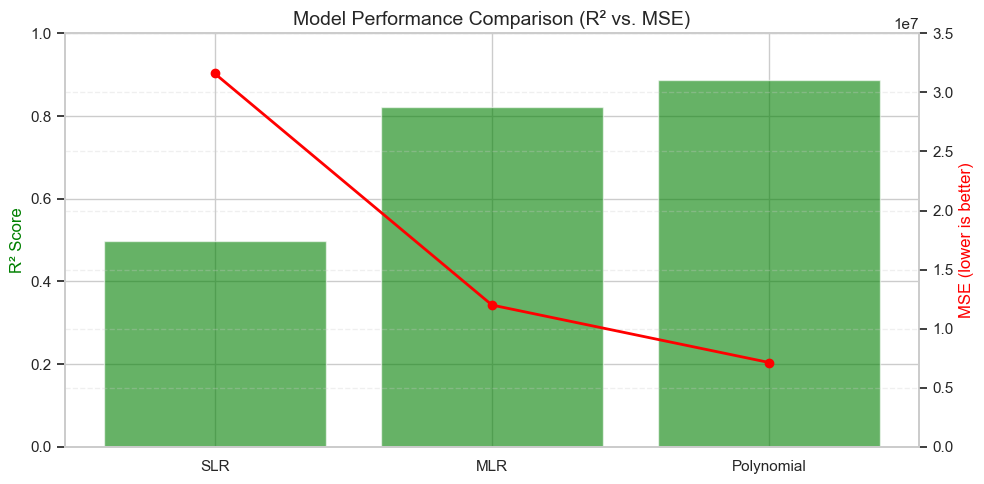

In [123]:
import matplotlib.pyplot as plt

# Model names and performance metrics
models = ['SLR', 'MLR', 'Polynomial']
r2_scores = [0.4966, 0.8210, 0.8865]
mse_scores = [3.16e7, 1.2e7, 7.133643e6]

fig, ax1 = plt.subplots(figsize=(10, 5))

# Primary y-axis: R² bar chart
ax1.bar(models, r2_scores, color='green', alpha=0.6, label='R²')
ax1.set_ylabel('R² Score', color='green')
ax1.set_ylim(0, 1)

# Secondary y-axis: MSE line plot
ax2 = ax1.twinx()
ax2.plot(models, mse_scores, color='red', marker='o', linewidth=2, label='MSE')
ax2.set_ylabel('MSE (lower is better)', color='red')
ax2.set_ylim(0, 3.5e7)

# Title and layout
plt.title("Model Performance Comparison (R² vs. MSE)", fontsize=14)
fig.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()


#### Model Performance Comparison – Visual Evaluation
The visual above presents a comparative evaluation of all three models based on both **R² score (green bars)** and **Mean Squared Error (MSE) (red line).**

**Polynomial Regression** demonstrates the strongest predictive performance, achieving **the highest R² value (0.89)** and **the lowest MSE (7.1 million).** This indicates the best overall model fit to the data.

**Multiple Linear Regression (MLR)** also performs well, with a solid R² score (~0.82). However, its MSE is higher compared to the polynomial model.

**Simple Linear Regression (SLR)** yields the lowest R² (~0.50) and the highest MSE (31 million), making it the least effective among the three.

**Conclusion:** The graphical analysis confirms that the **Polynomial Regression model** provides the most accurate and reliable fit, outperforming the others in terms of both explanatory power and error minimization. Hence, it is the preferred model for this use case.